In [1]:
import pandas as pd
import numpy as np

In [2]:
dmd_df = pd.read_csv("diamonds.csv")

In [3]:
dmd_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
dmd_df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
dmd_df.drop("depth", axis=1, inplace=True)

In [6]:
dmd_df.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


In [7]:
dmd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.7+ MB


In [8]:
from pycaret.regression import *

In [9]:
s = setup(dmd_df, target='price',session_id=123)

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(53940, 9)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(37757, 25)"


In [10]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,732.8,1.241e+06,1114,0.9188,-0,0.372
1,750.1,1.382e+06,1175,0.9156,-0,0.3905
2,745.8,1.244e+06,1115,0.9199,-0,0.3959
3,751.2,1.234e+06,1111,0.9265,-0,0.3879
4,760.6,1.62e+06,1273,0.9012,-0,0.4054
5,739.8,1.4e+06,1183,0.91,-0,0.37
6,755.8,1.282e+06,1132,0.9204,-0,0.4216
7,742.1,1.302e+06,1141,0.9181,-0,0.3938
8,734.5,1.193e+06,1092,0.9222,-0,0.4114
9,747.1,1.319e+06,1148,0.9153,-0,0.387


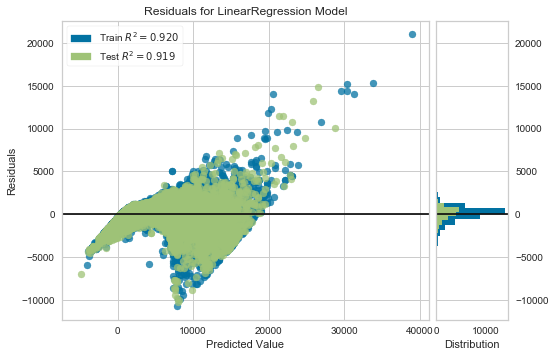

In [11]:
plot_model(lr)

In [13]:
s2 = setup(dmd_df, target='price', session_id=123, normalize=True,
           feature_interaction=True, categorical_features= ['cut','color','clarity'],
          numeric_features=['carat','table'])

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(53940, 9)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(37757, 34)"


In [14]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,294.4,3.142e+05,560.1,0.9802,0,0.0859,0.346
et,Extra Trees Regressor,277.4,3.156e+05,561.3,0.9801,0,0.0679,6.733
rf,Random Forest Regressor,279.7,3.163e+05,561.9,0.9801,0,0.0686,9.224
gbr,Gradient Boosting Regressor,403.8,5.442e+05,737.3,0.9658,0,0.1262,2.99
knn,K Neighbors Regressor,361.4,5.45e+05,737.3,0.9657,0,0.0974,0.4
dt,Decision Tree Regressor,374.5,5.791e+05,760.5,0.9635,0,0.0903,0.187
omp,Orthogonal Matching Pursuit,917.2,1.915e+06,1384,0.8794,0,0.3847,0.024
ada,AdaBoost Regressor,1052,1.973e+06,1404,0.8757,0,0.4511,2.067
llar,Lasso Least Angle Regression,810.8,2.084e+06,1433,0.8684,0,0.2667,0.015
en,Elastic Net,878.2,2.901e+06,1654,0.8185,0,0.3142,0.037


In [15]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,271.9,3.097e+05,556.5,0.9797,-0,0.0649
1,277.6,2.987e+05,546.5,0.9818,-0,0.0684
2,276.4,3.097e+05,556.5,0.9801,-0,0.0684
3,286.7,3.336e+05,577.6,0.9801,-0,0.0676
4,269.3,2.936e+05,541.8,0.9821,-0,0.0673
5,288.1,3.365e+05,580.1,0.9784,-0,0.0706
6,292,3.688e+05,607.3,0.9771,-0,0.0699
7,278.5,3.378e+05,581.2,0.9787,-0,0.0678
8,263.8,2.858e+05,534.6,0.9814,-0,0.0671
9,269.7,2.82e+05,531.1,0.9819,-0,0.0672


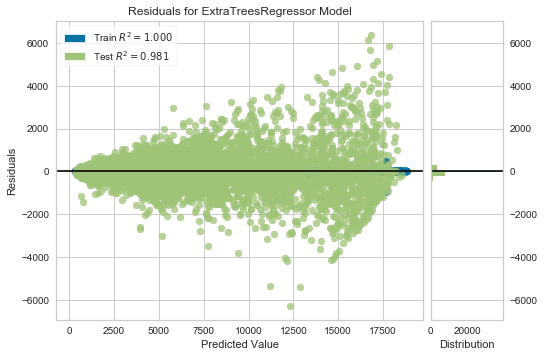

In [16]:
plot_model(et)

In [17]:
s2 = setup(dmd_df, target='price', session_id=123, normalize=True,
           feature_interaction=True, categorical_features= ['cut','color','clarity'],
          numeric_features=['carat','table'])

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(53940, 9)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(37757, 34)"


In [18]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,271.9,3.097e+05,556.5,0.9797,-0,0.0649
1,277.6,2.987e+05,546.5,0.9818,-0,0.0684
2,276.4,3.097e+05,556.5,0.9801,-0,0.0684
3,286.7,3.336e+05,577.6,0.9801,-0,0.0676
4,269.3,2.936e+05,541.8,0.9821,-0,0.0673
5,288.1,3.365e+05,580.1,0.9784,-0,0.0706
6,292,3.688e+05,607.3,0.9771,-0,0.0699
7,278.5,3.378e+05,581.2,0.9787,-0,0.0678
8,263.8,2.858e+05,534.6,0.9814,-0,0.0671
9,269.7,2.82e+05,531.1,0.9819,-0,0.0672


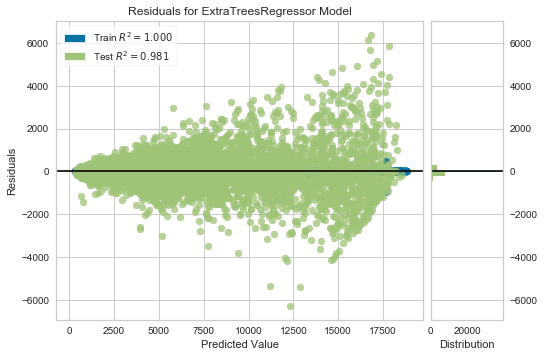

In [19]:
plot_model(et)

In [20]:
save_model(et, model_name='deployment_28062021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['cut', 'color',
                                                             'clarity'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['carat', 'table'],
                                       target='price', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_v...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
      